# Hola Bastian!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error laa primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General
    
Hola Bastian, te felicito por el desarrollo del proyecto. Completaste las diferentes secciones de muy buena manera. </div>

# Estrategia de Retención de Clientes para Model Fitness mediante Análisis de Datos y Modelos de Machine Learning

**Introducción**

La cadena de gimnasios Model Fitness enfrenta un desafío común en la industria: la pérdida de clientes. Para abordar este problema, Model Fitness ha digitalizado los perfiles de sus clientes y ha recolectado datos relevantes. El objetivo de este proyecto es desarrollar una estrategia basada en datos para predecir la probabilidad de pérdida de clientes y elaborar recomendaciones para mejorar la retención.

**Metodología**
El proyecto se desarrollará en varios pasos clave:
1. **Carga de los Datos**
    - Cargar el archivo CSV proporcionado por Model Fitness que contiene datos sobre la cancelación de un mes en concreto e información del mes anterior.
    - Inspeccionar el dataset para identificar cualquier dato faltante o anomalías.
    - Aplicar las correcciones necesarias, como el manejo de valores faltantes, la conversión de tipos de datos y la normalización de los valores.
    - Validar que los datos sean consistentes y estén listos para el análisis exploratorio.

2. **Análisis Exploratorio de Datos (EDA)**:
   - Observación del dataset para identificar características faltantes y estudiar valores promedio y desviaciones estándar.
   - Comparación de características entre clientes que cancelaron y los que se quedaron.
   - Visualización de distribuciones y correlaciones de las características.

3. **Construcción de Modelos de Predicción**:
   - Creación de un modelo de clasificación binaria para predecir la cancelación de clientes en el mes siguiente.
   - Entrenamiento de modelos usando regresión logística y bosque aleatorio.
   - Evaluación de los modelos mediante métricas de exactitud, precisión y recall.

4. **Clustering de Clientes**:
   - Estandarización de datos y creación de un dendrograma para identificar el número óptimo de clústeres.
   - Entrenamiento de un modelo de clustering K-means y análisis de los clústeres resultantes.
   - Evaluación de tasas de cancelación para cada clúster.

5. **Conclusiones y Recomendaciones**:
   - Identificación de grupos objetivo y sugerencia de medidas para reducir la rotación.
   - Formulación de recomendaciones específicas de marketing y estrategias de retención.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola Bastian, buen trabajo con el desarrollo de la sección de introducción del proyecto. </div>

## Cargar los Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto. </div>

### Cargar el Dataset

In [2]:
# Cargar el dataset
data = pd.read_csv('/datasets/gym_churn_us.csv')

# Mostrar las primeras filas del dataset
display(data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo cargando los datos del proyecto.  </div>

### Campos del Dataset Actuales
#### Datos del Usuario del Mes Anterior

In [3]:
# Listar los campos del usuario del mes anterior
user_data_fields = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Age', 'Lifetime']
display(data[user_data_fields].head())

,gender,Near_Location,Partner,Promo_friends,Phone,Age,Lifetime
0,1,1,1,1,0,29,3
1,0,1,0,0,1,31,7
2,0,1,1,0,1,28,2
3,0,1,1,1,1,33,2
4,1,1,1,1,1,26,3


#### Datos del Registro de Visitas y Compras y Estado Actual de la Membresía

In [4]:
# Listar los campos del registro de visitas y compras
membership_data_fields = ['Contract_period', 'Month_to_end_contract', 'Group_visits', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']
display(data[membership_data_fields].head())

,Contract_period,Month_to_end_contract,Group_visits,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total
0,6,5.0,1,0.020398,0.000000,14.227470
1,12,12.0,1,1.922936,1.910244,113.202938
2,1,1.0,0,1.859098,1.736502,129.448479
3,12,12.0,1,3.205633,3.357215,62.669863
4,1,1.0,0,1.113884,1.120078,198.362265


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta exploración.  </div>

## Llevar a cabo el análisis exploratorio de datos (EDA)

### Observación del Dataset

In [5]:
# Observa el dataset: ¿contiene alguna característica ausente? 
# Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

# Verificar si hay datos faltantes
missing_data = data.isnull().sum()

# Obtener estadísticas descriptivas
data_description = data.describe()

print("Datos faltantes por columna:")
display(missing_data)
print("\nEstadísticas descriptivas del dataset:")
display(data_description)

Datos faltantes por columna:


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


Estadísticas descriptivas del dataset:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta exploración.  </div>

### Valores Medios de las Características en Dos Grupos

In [6]:
# Observa los valores medios de las características en dos grupos: 
# para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

mean_values_by_churn = data.groupby('Churn').mean()

print("Valores medios de las características por grupo (Churn):")
display(mean_values_by_churn)

Valores medios de las características por grupo (Churn):


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo estudiando los valores medios de las características sujetos a que los clientes estén o no suscritos.  </div>

### Traza Histogramas de Barras y Distribuciones de Características

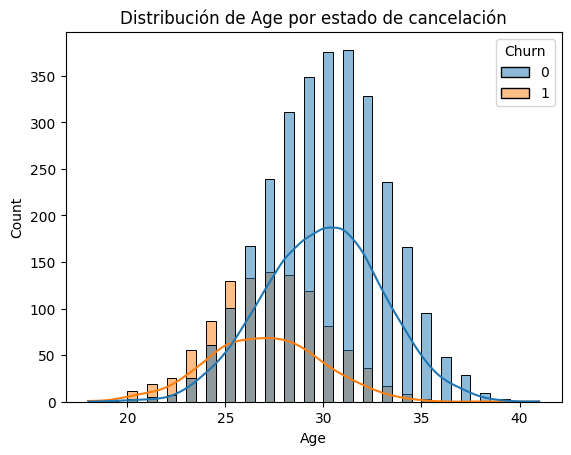

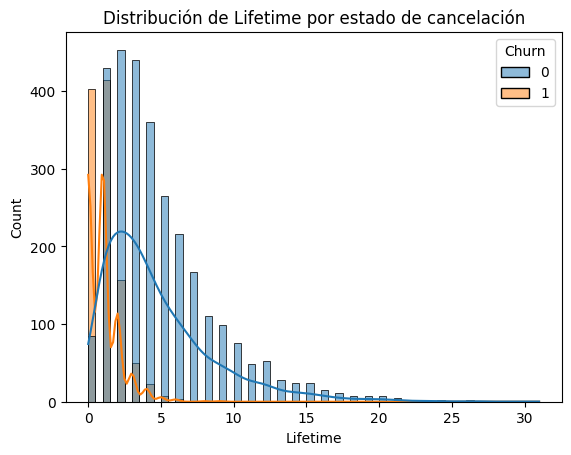

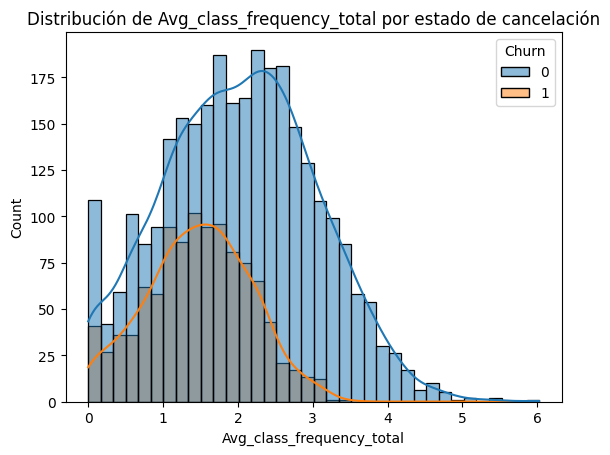

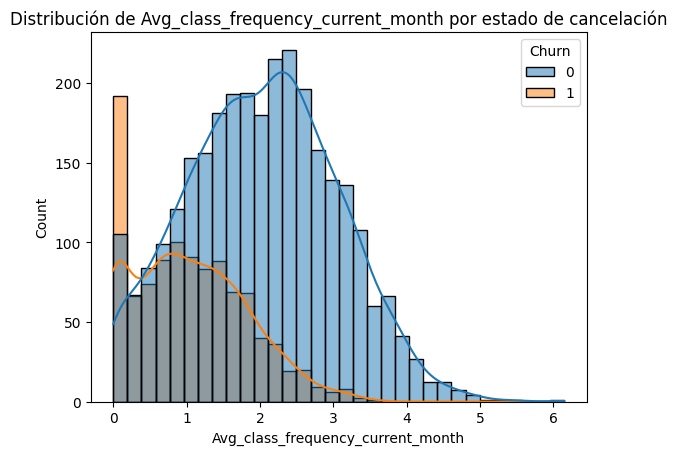

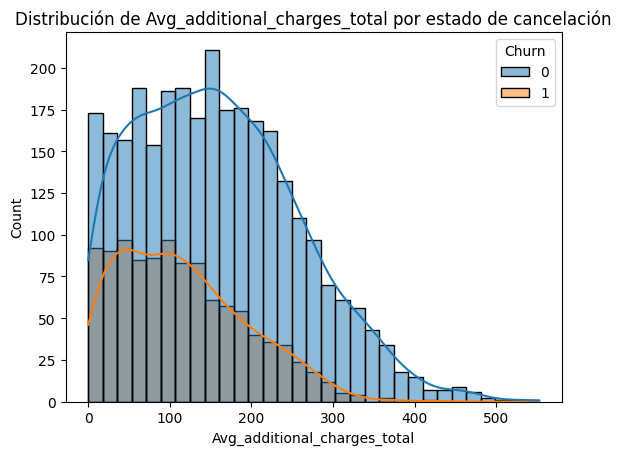

In [16]:
# Visualización de distribuciones
for column in ['Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']:
    sns.histplot(data=data, x=column, hue='Churn', kde=True)
    plt.title(f'Distribución de {column} por estado de cancelación')
    plt.show()

**Análisis de los Resultados del EDA**

**Distribuciones de Características por Estado de Cancelación**

1. **Distribución de Edad (Age):**
   - La mayoría de los clientes tienen entre 25 y 35 años.
   - Los clientes que cancelaron (Churn = 1) tienen una concentración mayor en edades más jóvenes (20-25 años) comparado con los que no cancelaron.
   - Los clientes mayores de 30 años parecen tener una menor tasa de cancelación.

2. **Distribución del Tiempo de Vida (Lifetime):**
   - La mayoría de los clientes tienen un tiempo de vida corto en el gimnasio, con un pico significativo en 0 a 5 meses.
   - Los clientes que cancelaron tienen un tiempo de vida más corto comparado con los que no cancelaron.
   - Esto indica que los nuevos clientes son más propensos a cancelar.

3. **Frecuencia de Clases Promedio Total (Avg_class_frequency_total):**
   - La frecuencia de clases promedio para clientes que no cancelaron es mayor.
   - Los clientes que asistieron a clases con mayor frecuencia a lo largo de su vida tienen menos probabilidades de cancelar.
   
4. **Frecuencia de Clases Promedio del Mes Actual (Avg_class_frequency_current_month):**
   - Los clientes que cancelaron tienen una frecuencia de clases muy baja en el mes actual, con muchos de ellos no asistiendo en absoluto.
   - La disminución en la frecuencia de clases en el mes actual es un fuerte indicador de cancelación.

5. **Gastos Adicionales Promedios Totales (Avg_additional_charges_total):**
   - Los clientes que gastaron más en servicios adicionales del gimnasio tienden a cancelar menos.
   - Hay una correlación negativa entre los gastos adicionales y la cancelación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto Bastian, buen trabajo con el desarrollo de los histogramas y con el estudio de los mismos.  </div>

### Crear una Matriz de Correlación y Mostrarla

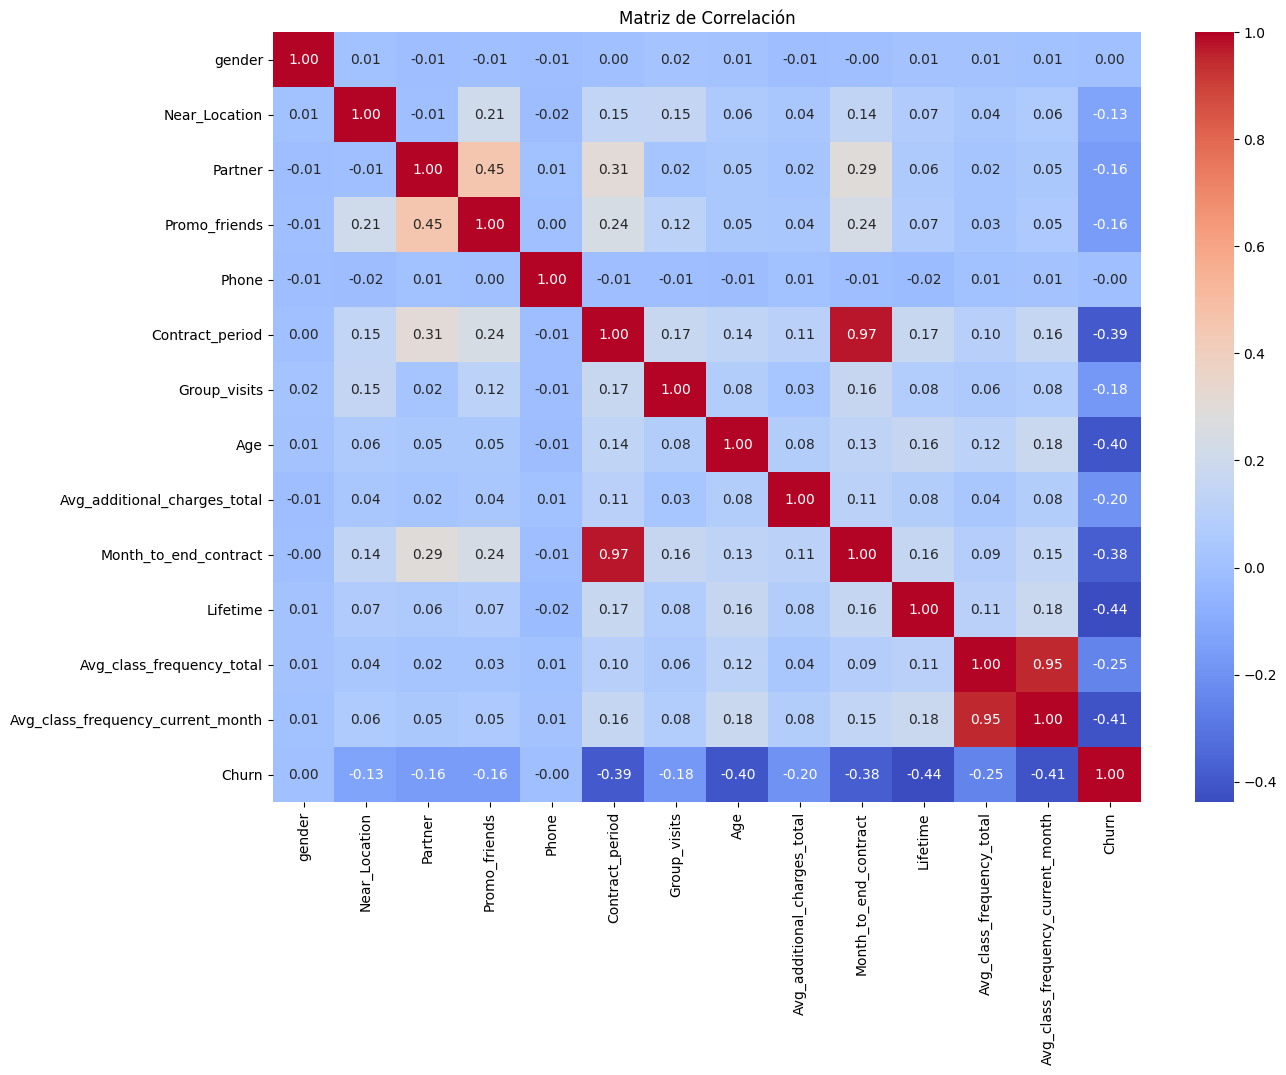

In [8]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

**Matriz de Correlación**

- **Edad (Age):**
  - Tiene una correlación negativa con la cancelación, lo que indica que los clientes mayores tienen menos probabilidades de cancelar.
  
- **Tiempo de Vida (Lifetime):**
  - Tiene una correlación negativa fuerte con la cancelación, indicando que los clientes con mayor tiempo en el gimnasio tienen menos probabilidades de cancelar.

- **Frecuencia de Clases (Avg_class_frequency_total y Avg_class_frequency_current_month):**
  - Ambas tienen una fuerte correlación negativa con la cancelación, lo que refuerza la observación de que los clientes más activos son menos propensos a cancelar.

- **Gastos Adicionales (Avg_additional_charges_total):**
  - También muestra una correlación negativa con la cancelación.

---

**Conclusiones del EDA**

- **Clientes Nuevos:**
  - Los clientes que son nuevos (bajo tiempo de vida) y jóvenes (20-25 años) son más propensos a cancelar.
  
- **Frecuencia de Uso:**
  - La frecuencia de uso tanto total como del mes actual es un fuerte predictor de cancelación. Clientes con menor uso reciente son más propensos a cancelar.

- **Gastos Adicionales:**
  - Los clientes que gastan más en servicios adicionales tienden a quedarse.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente Bastian, buen trabajo desplegando el heatmap de la matriz de correlación.  </div>

## Construir un Modelo para Predecir la Cancelación de Usuarios

### División de Datos en Conjuntos de Entrenamiento y Validación

In [9]:
# Separar características y la variable objetivo
X = data.drop('Churn', axis=1)
y = data['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con la creación de los sets de entrenamiento y validación de los datos.  </div>

### Entrenamiento del Modelo con Dos Métodos: Regresión Logística y Bosque Aleatorio
#### Regresión Logística

In [10]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto Bastian, buen trabajo con el despliegue de la regresión logística.   </div>

#### Bosque Aleatorio

In [11]:
# Crear y entrenar el modelo de bosque aleatorio
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con el despliegue del Random Forest. </div>

### Evaluación de los Modelos

In [12]:
# Predicciones de los modelos
logistic_pred = logistic_model.predict(X_test_scaled)
forest_pred = forest_model.predict(X_test)

# Evaluación de Regresión Logística
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)

# Evaluación de Bosque Aleatorio
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_precision = precision_score(y_test, forest_pred)
forest_recall = recall_score(y_test, forest_pred)

# Resultados
print(f'Regresión Logística - Accuracy: {logistic_accuracy}, Precision: {logistic_precision}, Recall: {logistic_recall}')
print(f'Bosque Aleatorio - Accuracy: {forest_accuracy}, Precision: {forest_precision}, Recall: {forest_recall}')

Regresión Logística - Accuracy: 0.91625, Precision: 0.8729281767955801, Recall: 0.7821782178217822
Bosque Aleatorio - Accuracy: 0.91, Precision: 0.8494623655913979, Recall: 0.7821782178217822


**Comparación de Resultados de los Modelos**

**Resultados de la Regresión Logística:**
- **Exactitud (Accuracy)**: 91.63%
- **Precisión (Precision)**: 87.29%
- **Recall**: 78.22%

**Resultados del Bosque Aleatorio:**
- **Exactitud (Accuracy)**: 91.00%
- **Precisión (Precision)**: 84.95%
- **Recall**: 78.22%

**Análisis de Resultados**

1. **Exactitud (Accuracy)**:
   - Ambos modelos tienen una alta exactitud, con la regresión logística mostrando un rendimiento ligeramente mejor (91.63%) en comparación con el bosque aleatorio (91.00%).

2. **Precisión (Precision)**:
   - La regresión logística tiene una precisión superior (87.29%) en comparación con el bosque aleatorio (84.95%). Esto indica que la regresión logística es mejor para identificar correctamente los clientes que realmente cancelan.

3. **Recall**:
   - Ambos modelos tienen el mismo valor de recall (78.22%), lo que sugiere que ambos son igualmente efectivos para capturar a la mayoría de los clientes que cancelan.

**Conclusión**

- **Modelo Preferido**: Basado en las métricas de evaluación, la regresión logística tiene una ligera ventaja en términos de exactitud y precisión. Por lo tanto, podemos preferir la `regresión logística` para predecir la cancelación de clientes en este caso específico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con el desarrollo de la evaluación de los modelos. </div>

## Crear Clústeres de Usuarios

### Estandarización de los Datos

In [13]:
# Deja de lado la columna con datos sobre la cancelación
X_clustering = X.copy()

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo desarrollando la estandarización de los datos.  </div>

### Crear una Matriz de Distancias y Trazar un Dendrograma

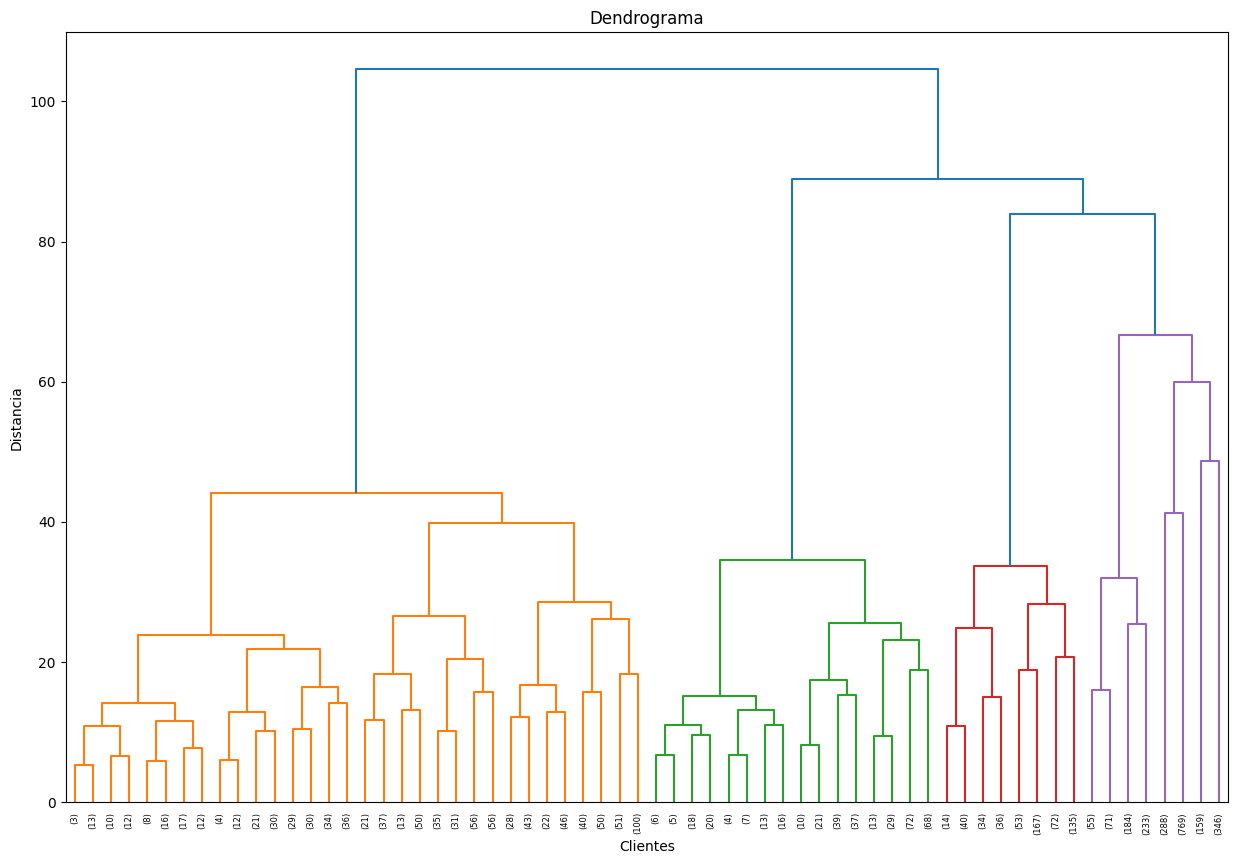

In [14]:
# Crear la matriz de distancias y trazar el dendrograma
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con el despliegue del dendograma. </div>

### Entrenamiento del Modelo de Clustering con K-means

In [15]:
# Entrenar el modelo de clustering K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clústeres al dataframe original
data['Cluster'] = clusters

# Mostrar los valores medios de características para los clústeres
cluster_means = data.groupby('Cluster').mean()

# Mostrar la tasa de cancelación para cada clúster
cluster_churn_rate = data.groupby('Cluster')['Churn'].mean()

print("Valores medios de las características por clúster:")

display(cluster_means)
print("\nTasa de cancelación por clúster:")

display(cluster_churn_rate)

Valores medios de las características por clúster:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839



Tasa de cancelación por clúster:


Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

**Conclusiones y Recomendaciones**

1. **Identificación de Grupos Objetivo**:
   - **Clústeres 1 y 2**: Estos clústeres tienen las tasas de cancelación más bajas. Se caracterizan por contratos más largos y una alta frecuencia de clases. Se debería enfocar en mantener y fomentar este comportamiento a través de programas de fidelización y recompensas por la alta frecuencia de visitas.
   - **Clúster 3**: Este clúster tiene la tasa de cancelación más alta. Se caracteriza por contratos muy cortos y baja frecuencia de clases. Se debería investigar más a fondo las razones de esta alta rotación y considerar ofrecer incentivos para aumentar la duración del contrato y la frecuencia de visitas.

2. **Medidas para Reducir la Rotación**:
   - **Incentivar Contratos Más Largos**: Ofrecer descuentos o beneficios adicionales para contratos de mayor duración.
   - **Promover Frecuencia de Visitas**: Implementar programas que recompensen la alta frecuencia de visitas, como descuentos en servicios adicionales.
   - **Aumentar la Participación en Actividades Grupales**: Fomentar la participación en clases grupales puede mejorar la retención.

3. **Patrones Observados**:
   - **Asociaciones y Promociones de Amigos**: Los clientes que se benefician de asociaciones corporativas y promociones de amigos tienden a tener tasas de cancelación más bajas. Se deberían fortalecer estas estrategias de marketing.
   - **Uso de Servicios Adicionales**: Los clientes que gastan más en servicios adicionales tienden a ser más leales. Promover el uso de estos servicios puede contribuir a la retención de clientes.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el estudio de las caracteristica sujeto a los resultados del cluster. </div>

---
## Conclusiones y Recomendaciones.
### Conclusiones:
1. **Frecuencia de Uso:**

   - Los `clientes que asisten regularmente a las clases`, tanto en general como específicamente en el mes actual, tienen una `menor probabilidad de cancelar.`
   - Los clientes con `baja frecuencia de clases`, especialmente en el `último mes`, están en `mayor riesgo` de cancelación.


2. **Tiempo de Vida y Contrato:**

   - Los clientes `nuevos` con un `tiempo de vida corto` en el gimnasio `son más propensos a cancelar.`
   - Los `contratos a corto plazo` están asociados con una `mayor tasa de cancelación, `mientras que los `contratos de largo plazo` muestran `mayor estabilidad.`


3. **Participación en Promociones y Servicios Adicionales:**

   - Las promociones como `"trae a un amigo"` tienen un impacto positivo en la retención de ciertos clústeres.
   - Los clientes que gastan más en servicios adicionales del gimnasio tienden a ser más leales.


4. **Segmentación de Clientes:**

   - Los diferentes clústeres de clientes tienen `características y comportamientos únicos`, lo que requiere `estrategias` de retención específicas para cada grupo.


### Recomendaciones:

1. **Fomentar la Participación Regular:**

   - **Implementación:**
     - Enviar `recordatorios y notificaciones` personalizadas para `fomentar la asistencia` regular a las clases.
     - Ofrecer `incentivos` como `descuentos o clases gratuitas` a los clientes que mantengan una `alta frecuencia de uso.`
   - **Ejemplo:**
     - `"Participa en 10 clases este mes y obtén una sesión de entrenamiento personal gratuita."`


2. **Programas de Bienvenida y Retención para Nuevos Clientes:**

   - **Implementación:**
     - Crear un programa de bienvenida que incluya orientación, `una sesión de entrenamiento inicial gratuita y seguimiento personalizado durante los primeros tres meses.`
     - Ofrecer `descuentos` en la `renovación de contratos` antes de que `expiren.`
   - **Ejemplo:**
     - `"Únete al programa de bienvenida y recibe un plan de entrenamiento personalizado y seguimiento durante los primeros tres meses."`


3. **Promociones de Contratos a Largo Plazo:**

   - **Implementación:**
     - Ofrecer descuentos y beneficios adicionales para los contratos de `6 y 12 meses`.
     - Crear paquetes que `incluyan servicios adicionales` **(masajes, productos deportivos)** para clientes con contratos a largo plazo.


   - **Ejemplo:**
     - `"Renueva tu contrato por 12 meses y obtén un 20% de descuento en todos los servicios adicionales del gimnasio."`

4. **Personalización y Segmentación de Ofertas:**

   - **Implementación:**
     - Utilizar los datos de segmentación para enviar ofertas personalizadas y promociones específicas a cada clúster de clientes.
     - Dirigir las promociones de `"trae a un amigo"` y otros descuentos a los clústeres que han mostrado una respuesta positiva a estas ofertas.
   - **Ejemplo:**
     - `"Trae a un amigo y ambos obtendrán un mes gratis. Oferta especial solo para nuestros miembros del clúster 0."`


### Principios Esenciales:

1. **Monitoreo y Análisis Continuo:**

   - `Mantener un seguimiento continuo` de la frecuencia de uso y otros indicadores clave para `identificar rápidamente` a los clientes en riesgo de cancelación y tomar acciones proactivas.


2. **Comunicación Personalizada:**

   - Enviar mensajes personalizados y relevantes basados en el comportamiento y las preferencias de los clientes, utilizando la segmentación de datos para mejorar la efectividad de las `comunicaciones.`


3. **Incentivos y Recompensas:**

   - Ofrecer incentivos y recompensas a los clientes que demuestren `lealtad` y un uso regular del gimnasio, fomentando así una `mayor retención` y satisfacción del cliente.


Implementar estas estrategias basadas en los análisis realizados permitirá a Model Fitness mejorar significativamente la retención de clientes y fomentar una mayor lealtad entre sus miembros.

---

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo Bastian-. </div>